In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [59]:
data = pd.read_csv('filename.csv')

In [60]:
pd.set_option('display.max_columns', None)

In [61]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en,[],[],[],0,0,0,[],[],https://twitter.com/TomasLiptai/status/1630366...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,The Russia HAARP which could destroy USA in on...,en,[],['https://reality-choice.org/177/sura-the-russ...,[],0,0,0,[],[],https://twitter.com/paperfloure/status/1630366...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,Putin gives Steven Seagal Russia&amp;#8217;s O...,en,[],['https://thehill.com/blogs/in-the-know/387609...,[],0,0,0,[],[],https://twitter.com/katetbar1/status/163036622...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en,[],[],[],0,0,0,[],[],https://twitter.com/JlhRDHMOM/status/163036622...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en,[],[],[],0,0,0,[],[],https://twitter.com/PhemiKali/status/163036622...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [62]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [63]:
data=data[['username','tweet','language']]
data.head()

,username,tweet,language
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en
1,paperfloure,The Russia HAARP which could destroy USA in on...,en
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,en
3,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en
4,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en


# Data Preprocessing

In [64]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [65]:
data['language'].value_counts()

language
en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: count, dtype: int64

In [66]:
df=data.copy()

### So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets:

In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
stemmer = nltk.SnowballStemmer("english")

In [77]:
stopword=set(stopwords.words('english'))

AttributeError: 'set' object has no attribute 'words'

In [79]:
stemmer.stem('Shaniyaz is a good boy and best in the world')

'shaniyaz is a good boy and best in the world'

In [80]:
data.shape

(10014, 6)

In [81]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=text.split(' ')
    text =  [ stemmer.stem(word) for word in text if word not in stopword ]
    text = ' '.join(text)
    return text

In [82]:
clean('Shaniyaz is a good boy')

'shaniyaz good boy'

In [83]:
data['tweet'] = data['tweet'].apply(clean)

In [84]:
data['tweet']

0            nazijaeg derwen  russia place satan rule well
1        russia haarp could destroy usa one fell swoop ...
2             putin give steven seagal  order friendship  
3             mainelif baddcompani it alway project russia
4        pottingpink mfarussia modrussia milhistrf muze...
                               ...                        
10009    wallacemick ukrain invester war russia putin w...
10010    tomusernam dark rumor zelenski regim traffick ...
10011    elonmusk russia lose rothschild come u next ru...
10012        ronfilipkowski look forward russia liber kiev
10013    lylalila read yes heartbreak  russia terrorist...
Name: tweet, Length: 10014, dtype: object

### Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:

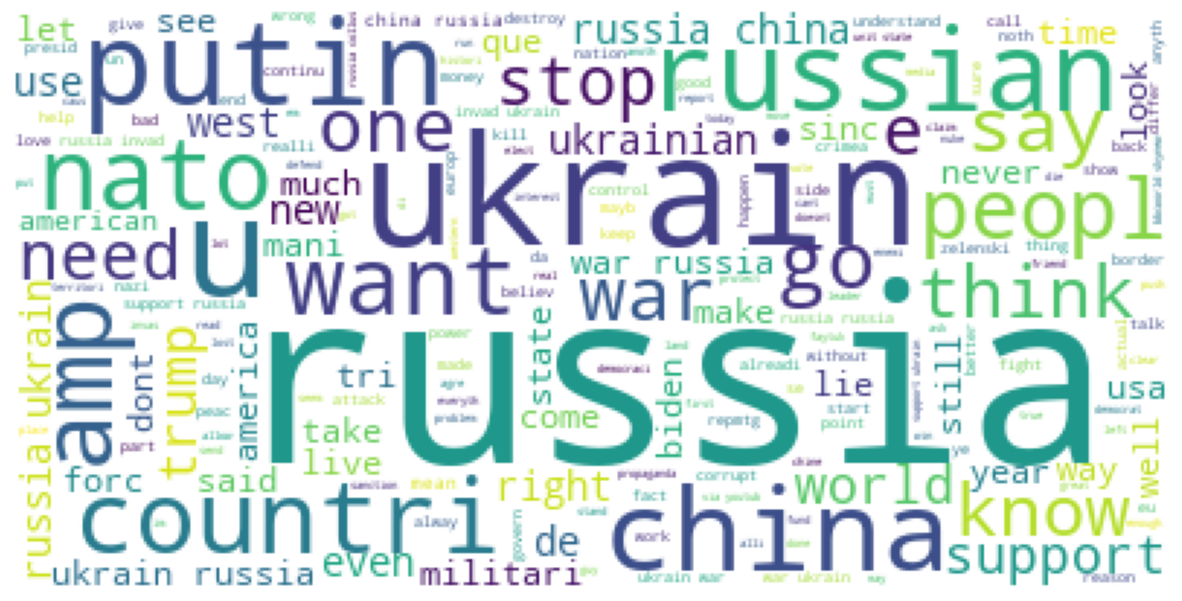

In [52]:
# all the tweets in a single Para. or Line
text = ' '.join(i for i in data['tweet'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [53]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shani\AppData\Roaming\nltk_data...


True

In [54]:
sentiments = SentimentIntensityAnalyzer()

In [67]:
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]

In [68]:
df.head()

,username,tweet,language,Positive,Negative,Neutral
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en,0.189,0.000,0.811
1,paperfloure,The Russia HAARP which could destroy USA in on...,en,0.000,0.308,0.692
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,en,0.266,0.000,0.734
3,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en,0.000,0.000,1.000
4,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en,0.043,0.074,0.883


In [69]:
df.describe()

,Positive,Negative,Neutral
count,10014.000000,10014.000000,10014.000000
mean,0.080451,0.108193,0.811361
std,0.098594,0.112881,0.141253
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.714000
50%,0.052000,0.088000,0.812000
75%,0.133000,0.178000,0.925750
max,1.000000,0.872000,1.000000


In [70]:
df.sample(10)

,username,tweet,language,Positive,Negative,Neutral
4367,ben31242023,@MaziUbaOfficial @CatrionaLaing1 @IntlCrimCour...,en,0.162,0.000,0.838
8865,fidel_digital,@VeronXIV @Truethoughts68 @Josh_SW6 It's a bet...,en,0.139,0.117,0.745
2575,jojo81090008,@AbdallahMiZ195 @HusamKhuffash @ChrisBr4256249...,en,0.112,0.325,0.562
5848,billdautrieve,@realTuckFrumper Cut him out and give it strai...,en,0.158,0.175,0.667
8323,canonicblsphemy,New story on NPR: A look at Russia's informati...,en,0.047,0.172,0.781
3791,wa95925441,@361OAKU @Diogenes1 @Russia @russiabeyond @Rus...,en,0.097,0.000,0.903
5590,missquanyi18,10. and wants to increase intensity of conflic...,en,0.112,0.209,0.678
2145,faceismine,@The_Trump_Train What about all the DA campaig...,en,0.164,0.037,0.799
151,bigguyr1,@Sean00990 @theallinpod @DavidSacks You and @D...,en,0.074,0.117,0.809
6146,adiburtel,@Ramy_Sawma Correction. They are not chanting ...,ro,0.000,0.353,0.647


In [85]:
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]

In [86]:
data.head()

,username,tweet,language,Positive,Negative,Neutral
0,tomasliptai,nazijaeg derwen russia place satan rule well,en,0.259,0.000,0.741
1,paperfloure,russia haarp could destroy usa one fell swoop ...,en,0.000,0.280,0.720
2,katetbar1,putin give steven seagal order friendship,en,0.367,0.000,0.633
3,jlhrdhmom,mainelif baddcompani it alway project russia,en,0.000,0.000,1.000
4,phemikali,pottingpink mfarussia modrussia milhistrf muze...,en,0.068,0.078,0.854


### Now let’s have a look at the most frequent words used by people with positive sentiments: